In [46]:
import sys

sys.path.append("../src/")
sys.path.append("../src/AtomicH")


In [47]:

import dipolelosses
import potentials
import constants
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels

In [48]:

c=DipoleChannels[0]

B_values = np.logspace(-3,100,50)

pot      = potentials.Silvera_Triplet
T_values = np.logspace(-3,2,50)
B_value  = 1e-5

SummedG=[]
for T in T_values:
    SummedG.append(dipolelosses.GetSummedGFactor(c, B_value, constants.HydrogenConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000)))
SummedG=np.array(SummedG)

In [18]:
GVsB_PW_H=[]
PWaves=[[0,2],
        [2,2],
        [2,4],
        [4,2],
        [4,4],
        [4,6]]

# Only m=0 in initial state (Weinberg lectures in quantum mechanics, p260)
degeneracies1 = [1,
                1,
                1,
                1,
                1,
                1,
                1]



for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(dipolelosses.GetGFactor(c,  B_value, constants.HydrogenConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=PW[0],lout=PW[1]))
    GVsB_PW_H.append(np.array(Gs))

/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)


In [49]:
amu=1.672621925e-27
A = 1e-6 / (constants.BohrInAng*1e-10)**2 * np.sqrt(amu/(4*constants.kb))
AT = 1e-6 / (constants.BohrInAng*1e-10)**2 * np.sqrt((3*amu)/(4*constants.kb))


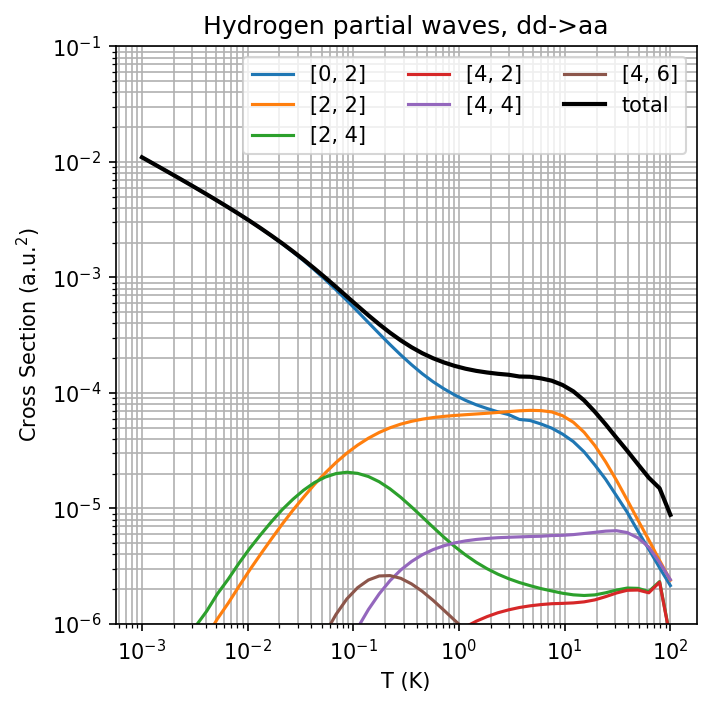

In [50]:
plt.figure(figsize=(5,5),dpi=150)

for iPW in range(0,len(PWaves)):
    plt.plot(T_values,A*GVsB_PW_H[iPW]*degeneracies1[iPW]/np.sqrt(T_values),label=str(PWaves[iPW]))
plt.plot(T_values, A*SummedG/np.sqrt(T_values),linewidth=2,color='black',label='total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Hydrogen partial waves, dd->aa")
plt.grid(which='both')
plt.legend(ncol=3)
plt.loglog()
plt.ylim(1e-6,1e-1)

plt.show()

In [10]:
GVsB_PW_T=[]
PWaves=[[0,2],
        [2,2],
        [2,4],
        [4,2],
        [4,4],
        [4,6]]

# Only m=0 in initial state (Weinberg lectures in quantum mechanics, p260)
degeneracies1 = [1,
                1,
                1,
                1,
                1,
                1,
                1]



for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(dipolelosses.GetGFactor(c,  B_value, constants.TritiumConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=PW[0],lout=PW[1]))
    GVsB_PW_T.append(np.array(Gs))

/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: divide by zero encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),TripletProj),Rotator)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: overflow encountered in matmul
  Ret

In [21]:
SummedGT=[]
for T in T_values:
    SummedGT.append(dipolelosses.GetSummedGFactor(c, B_value, constants.TritiumConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000)))
SummedGT=np.array(SummedGT)

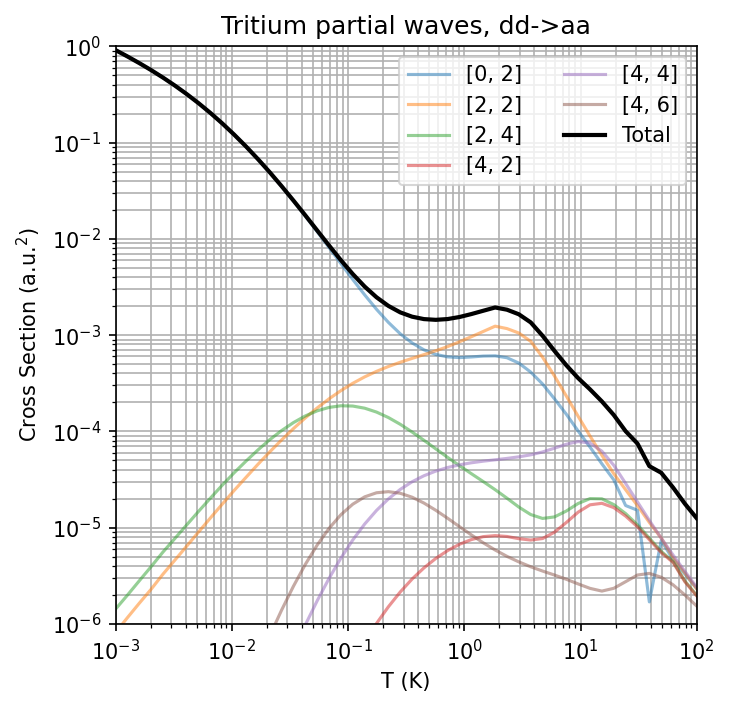

In [40]:

plt.figure(figsize=(5,5),dpi=150)

for iPW in range(0,len(PWaves)):
    plt.plot(T_values,AT*GVsB_PW_T[iPW]*degeneracies1[iPW]/np.sqrt(T_values),label=str(PWaves[iPW]),alpha=0.5)
plt.plot(T_values, AT*SummedGT/np.sqrt(T_values),linewidth=2,color='black',label='Total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Tritium partial waves, dd->aa")
plt.grid(which='both')
plt.legend(ncol=2)
plt.loglog()
plt.ylim(1e-6,1)
plt.xlim(1e-3,1e2)
plt.show()